<a href="https://colab.research.google.com/github/livio-24/LoanEligibilityPrediction/blob/main/LoanEligibilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRERIE

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

COLLEZIONE DATI

In [4]:
url = "https://raw.githubusercontent.com/livio-24/LoanEligibilityPrediction/main/dataset.csv"

#caricamento dataset in un pandas dataframe
dataset = pd.read_csv(url)

#prime 5 righe
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


EXPLORATIVE DATA ANALYSIS

In [ ]:
#numero righe e colonne
dataset.shape

(614, 13)

In [ ]:
dataset.describe()
#misure statistiche

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#info sulle colonne
#5 variabili numeriche e 8 variabili categoriche
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# numero di valori mancanti in ogni colonna
# verranno gestiti successivamente nella fase di data cleaning
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1]:
#conversione variabili categoriche in numeriche
#dataset.replace({'Gender':{'Male':0, 'Female':1}, 'Married' :{'No':0, 'Yes':1}, 'Education':{'Not Graduate':0, 'Greduate':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Urban':1, 'Semi_Urban':2}, 'Loan_Status':{'No':0, 'Yes':1}})

DATA VISUALIZATION

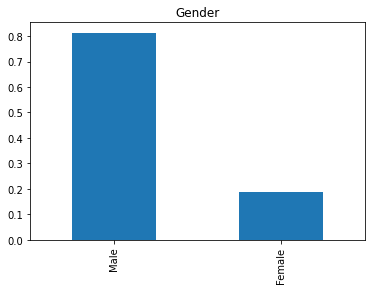

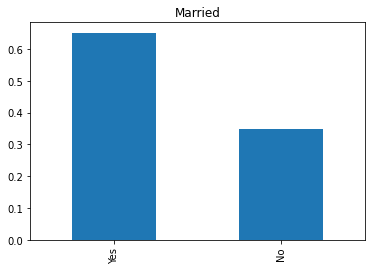

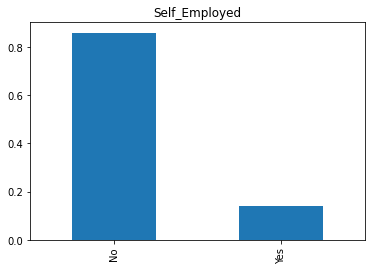

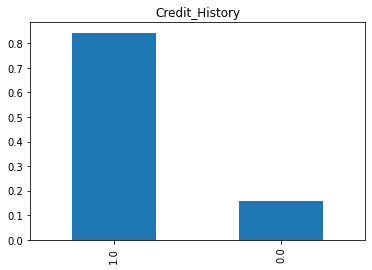

In [6]:
#visualizzazione valori variabili catagoriche in percentuale
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Dai seguenti grafici abbiamo che:
- 80% dei candidati nel dataset sono maschi
- Circa il 65% dei candidati nel dataset sono sposati
- Circa il 15% lavorano in proprio
- Circa l'85% hanno ripagato i loro debiti

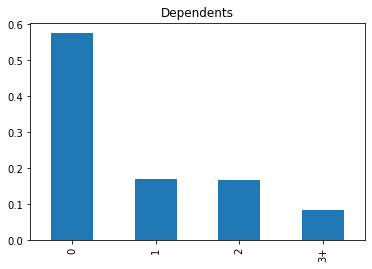

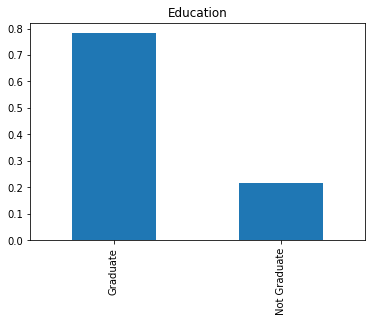

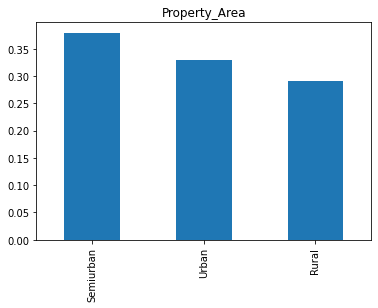

In [7]:
#visualizzazione valori variabili ordinali in percentuale
dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Dai seguenti grafici otteniamo che:
- La maggior parte dei candidati non ha familiari dipendenti
- Circa l'80% dei candidati sono laureati
- La maggior parte dei candidati vivono in un area semiurbana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


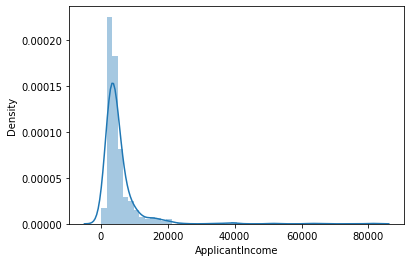

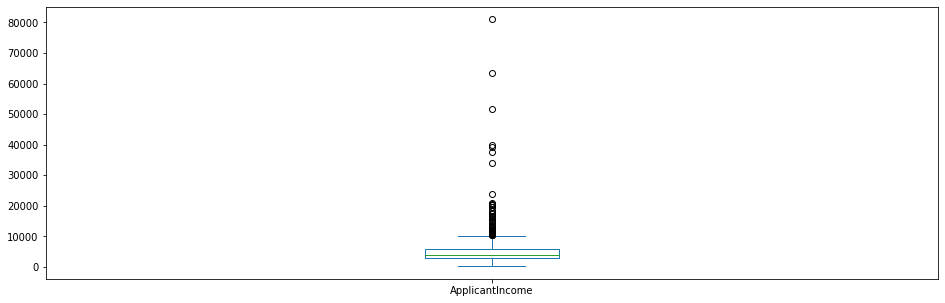

In [8]:
#visualizzazione distribuzione variabile 'ApplicantIncome'
sns.distplot(dataset['ApplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


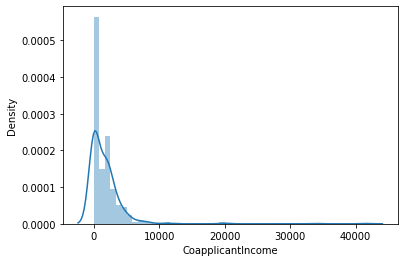

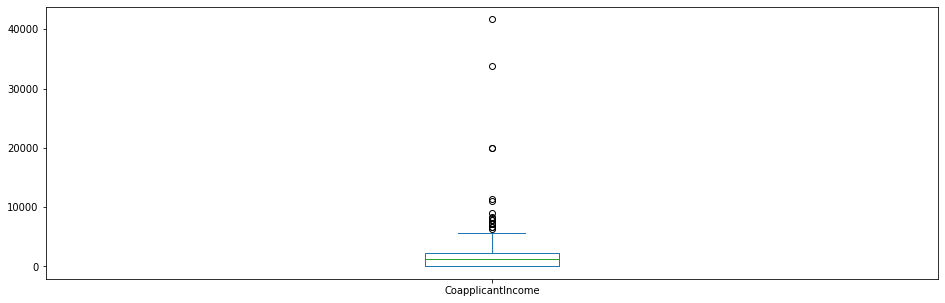

In [9]:
#visualizzazione distribuzione variabile 'CoapplicantIncome'
sns.distplot(dataset['CoapplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


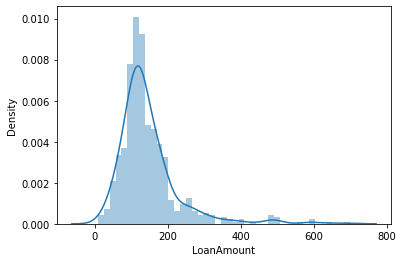

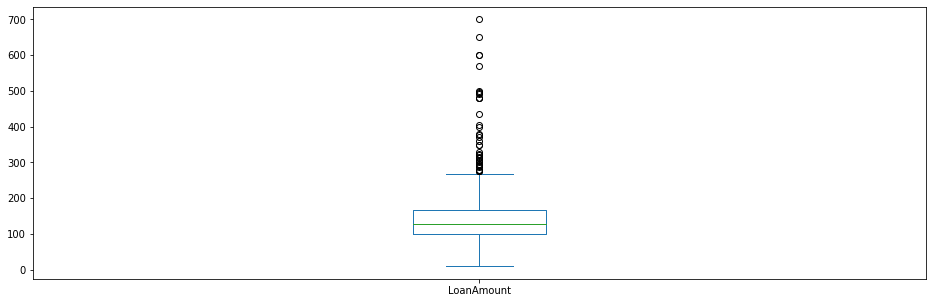

In [10]:
#visualizzazione distribuzione variabile 'LoanAmount'
sns.distplot(dataset['LoanAmount'])
plt.show()
dataset['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


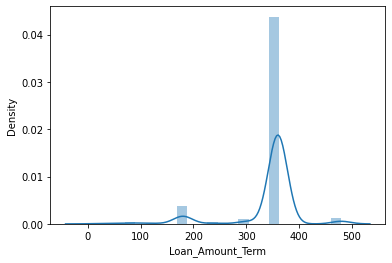

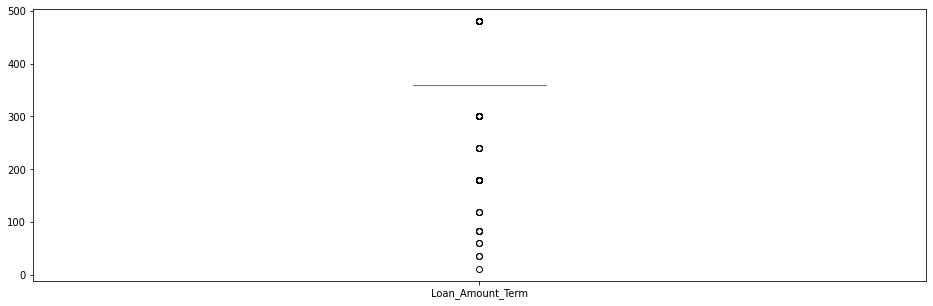

In [11]:
#visualizzazione distribuzione variabile 'Loan_Amount_Term'
sns.distplot(dataset['Loan_Amount_Term'])
plt.show()
dataset['Loan_Amount_Term'].plot.box(figsize=(16,5))
plt.show()